In [1]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
boston = load_diabetes()
X = boston.data
y = boston.target
y.shape

(442,)

In [2]:
u = np.mean(X)
std = np.std(X)
X = (X-u)/std

In [3]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))

In [4]:
def hypothesis(X,theta):
    y_ = np.dot(X,theta)
    return y_

def error(X,y,theta):
    m,n = X.shape
    y_ = hypothesis(X,theta)
    err = np.sum((y_-y)**2)
    return err/m

def gradient(X,y,theta):
    m,n = X.shape
    y_ = hypothesis(X,theta)
    grad = np.dot((y_-y).T,X)
    return grad/m

def gradientDescent(X, y, learning_rate = 0.1, epoch = 500):
    m,n = X.shape
    theta = np.zeros((n,))
    grad = np.zeros((n,))
    err = []
    for i in range(epoch):
        er = error(X,y,theta)
        err.append(er)
        grad = gradient(X,y,theta)
        theta = theta - learning_rate * grad
    return err,theta
    

In [5]:
err,theta  = gradientDescent(X,y)

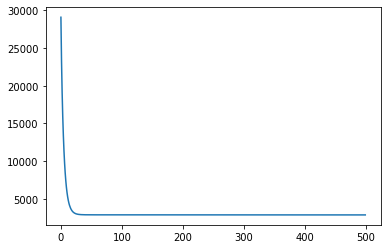

In [6]:
plt.plot(err)

In [7]:
def r2_score(y,ypred):
    ymean = y.mean()
    num = np.sum((y-ypred)**2)
    denum = np.sum((y-ymean)**2)
    score = 1 - num/denum
    return score

In [8]:
ypred = hypothesis(X,theta)

In [9]:
r2_score(y,ypred)

0.5161462511905732

In [11]:
print(ypred)

[204.47476261  69.55529426 175.07681621 164.42418534 128.09950505
 105.93036319  77.4384869  121.47551832 159.41472688 214.10073378
 100.08130938 101.65214924 114.67717452 162.50862854 101.89489467
 174.02808846 209.72895569 182.15499172 146.79503536 122.52659771
 118.82263925  89.83039951 116.98760375 269.02720684 164.12458471
 145.38395301  96.58489086 178.16224138 127.97728405 183.70199674
 159.2855885   69.37922314 256.63177582 107.86307846  80.11877183
  83.86009956 207.07547071 155.08672839 242.13838826 135.82973968
 153.11495347  73.60825213 143.85107402  78.43203372 218.03100383
 124.09543823 140.63375893 107.63398025  76.40864003 186.40508574
 157.67554629 167.69265199 133.59314457 157.62185132 140.66452911
  73.59269609 205.64239852  79.79212993  97.19373928 133.95721925
 114.80849152 176.23389657  65.60544128 100.27124882 112.79884409
 186.23570477 145.59520918 123.78632055 112.84475871 123.3483288
  75.45650858 235.95411045 146.56789634 122.8689964  150.455565
 126.35403833